In [82]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from sklearn.metrics import silhouette_score

In [41]:
df = pd.read_csv('C://Users/Uldum/Downloads/clustering_test_work.csv')

In [42]:
df.head(15)

,Unnamed: 0,actual_id,period_end,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,unigenders,recency,aov
0,0,12013601421,2021-02-19,2,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,123,17920.0
1,1,12013601421,2021-04-19,3,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,182,17920.0
2,2,12013601421,2021-06-19,4,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,243,17920.0
3,3,12013601421,2021-08-19,5,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,304,17920.0
4,4,12013601421,2021-10-19,6,17920.0,4,1,0,1.0,1.0,0.0,0.8,4.0,1,365,17920.0
5,5,12013601421,2021-12-19,7,0.0,0,0,0,0.0,0.0,0.0,1.0,4.0,1,426,0.0
6,6,12013601421,2022-02-19,8,0.0,0,0,0,0.0,0.0,0.0,1.0,4.0,1,488,0.0
7,7,12013601421,2022-04-19,9,0.0,0,0,0,0.0,0.0,0.0,1.0,4.0,1,547,0.0
8,8,12013601421,2022-06-19,10,0.0,0,0,0,0.0,0.0,0.0,1.0,4.0,1,608,0.0
9,9,12013601421,2022-08-19,11,0.0,0,0,0,0.0,0.0,0.0,1.0,4.0,1,669,0.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2247574 entries, 0 to 2247573
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   Unnamed: 0           int64  
 1   actual_id            int64  
 2   period_end           object 
 3   num                  int64  
 4   revenue_lastyear     float64
 5   quantity_lastyear    int64  
 6   orders_lastyear      int64  
 7   orders_refund        int64  
 8   ratio_not_dh         float64
 9   ratio_online         float64
 10  ratio_refund         float64
 11  avg_ratio_purchase   float64
 12  quantity_1st_period  float64
 13  unigenders           int64  
 14  recency              int64  
 15  aov                  float64
dtypes: float64(7), int64(8), object(1)
memory usage: 274.4+ MB


In [44]:
# категориальная колонка, на всякий случай посмотрим что в ней
df['unigenders'].value_counts()

1    2161306
2      86268
Name: unigenders, dtype: int64

In [45]:
# применим метод преобразования категориальных колонок - get_dummies
df = pd.get_dummies(df, columns=['unigenders'])

In [46]:
# Начинаем искать клиентов в оттоке, для этого возьмём последний период наблюдений (2022-12-07) и уберём выберем тех, 
# кто не был активен в течении более 365 дней
df_churn = df.loc[df['period_end'] == '2022-12-07']
df_churn2 = df_churn.loc[df_churn['recency'] >= 365]
df_churn.head(15)

,Unnamed: 0,actual_id,period_end,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,recency,aov,unigenders_1,unigenders_2
11,11,12013601421,2022-12-07,13,0.0,0,0,0,0.0,0.0,0.0,1.0,4.0,779,0.0,1,0
16,16,12013960666,2022-12-07,6,27960.0,2,1,0,1.0,0.0,0.0,1.0,2.0,339,27960.0,1,0
22,22,12019257700,2022-12-07,7,0.0,0,0,0,0.0,0.0,0.0,1.0,5.0,383,0.0,1,0
31,31,12019824362,2022-12-07,10,0.0,0,0,0,0.0,0.0,0.0,1.0,1.0,586,0.0,1,0
43,43,12026154577,2022-12-07,13,0.0,0,0,0,0.0,0.0,0.0,1.0,4.0,745,0.0,1,0
49,49,12036908016,2022-12-07,7,0.0,0,0,0,0.0,0.0,0.0,1.0,1.0,424,0.0,1,0
55,55,12038211596,2022-12-07,7,0.0,0,0,0,0.0,0.0,0.0,1.0,2.0,376,0.0,1,0
64,64,1206236695,2022-12-07,10,0.0,0,0,0,0.0,0.0,0.0,1.0,2.0,582,0.0,1,0
71,71,12062762674,2022-12-07,8,0.0,0,0,0,0.0,0.0,0.0,1.0,2.0,471,0.0,1,0
82,82,12063064757,2022-12-07,12,0.0,0,0,0,0.0,0.0,0.0,1.0,2.0,690,0.0,1,0


In [47]:
# чекаем дубликаты (надо было сделать это выше, но их всё равно нет)
df.duplicated().unique()

array([False])

In [48]:
# посчитаем число уникальных пользователей
print(df['actual_id'].nunique())

302119


In [50]:
# проверим пропуски в датасете
df.isna().sum()

Unnamed: 0             0
actual_id              0
period_end             0
num                    0
revenue_lastyear       0
quantity_lastyear      0
orders_lastyear        0
orders_refund          0
ratio_not_dh           0
ratio_online           0
ratio_refund           0
avg_ratio_purchase     0
quantity_1st_period    0
recency                0
aov                    0
unigenders_1           0
unigenders_2           0
dtype: int64

In [51]:
# вернёмся к датасету с клиентами в оттоке
df_churn2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119808 entries, 11 to 2247556
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           119808 non-null  int64  
 1   actual_id            119808 non-null  int64  
 2   period_end           119808 non-null  object 
 3   num                  119808 non-null  int64  
 4   revenue_lastyear     119808 non-null  float64
 5   quantity_lastyear    119808 non-null  int64  
 6   orders_lastyear      119808 non-null  int64  
 7   orders_refund        119808 non-null  int64  
 8   ratio_not_dh         119808 non-null  float64
 9   ratio_online         119808 non-null  float64
 10  ratio_refund         119808 non-null  float64
 11  avg_ratio_purchase   119808 non-null  float64
 12  quantity_1st_period  119808 non-null  float64
 13  recency              119808 non-null  int64  
 14  aov                  119808 non-null  float64
 15  unigenders_1   

In [52]:
# Число отвалившихся клиентов, если брать уровень 1 год
print(df_churn2['actual_id'].nunique())

119808


In [53]:
# теперь посчитаем число клиентов в предоттоке (не делали заказы более 300 дней на последний период наблюдений)
df_poss = df.loc[df['period_end'] == '2022-12-07']
df_poss = df_poss.loc[df_poss['recency'] < 365]
df_poss = df_poss.loc[df_poss['recency'] > 300]
df_poss.head(15)

,Unnamed: 0,actual_id,period_end,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,recency,aov,unigenders_1,unigenders_2
16,16,12013960666,2022-12-07,6,27960.0,2,1,0,1.000000,0.0,0.0,1.0,2.0,339,27960.000000,1,0
91,91,12063704219,2022-12-07,10,10960.0,2,1,0,1.000000,1.0,0.0,1.0,3.0,326,10960.000000,1,0
133,133,12068234221,2022-12-07,6,14960.0,2,2,0,0.624374,1.0,0.0,1.0,2.0,337,7480.000000,1,0
153,153,12069928477,2022-12-07,10,24960.0,2,1,0,1.000000,0.0,0.0,1.0,1.0,360,24960.000000,1,0
503,503,13476093978,2022-12-07,6,7960.0,2,1,0,1.000000,0.0,0.0,1.0,2.0,313,7960.000000,1,0
793,793,14256630711,2022-12-07,6,11440.0,3,1,0,1.000000,0.0,0.0,1.0,3.0,338,11440.000000,1,0
852,852,1508255895,2022-12-07,6,71920.0,4,1,0,1.000000,0.0,0.0,1.0,4.0,357,71920.000000,1,0
974,974,16178931544,2022-12-07,10,100720.0,14,3,3,1.000000,1.0,1.0,1.0,10.0,358,33573.333333,1,0
979,979,16195789599,2022-12-07,6,13980.0,1,1,1,1.000000,1.0,1.0,1.0,1.0,306,13980.000000,1,0
991,991,16197729545,2022-12-07,13,24162.0,2,1,0,1.000000,1.0,0.0,1.0,2.0,362,24162.000000,0,1


In [54]:
# Число клиентов в предоттоке, если брать уровень 300 дней
print(df_poss['actual_id'].nunique())

24722


In [55]:
# преобразуем колонку последней даты покупки в 1 и 0, где 0 - клиент в оттоке, 1 - условно активен
# Дальше будем обучать модель классификации ансамбля деревьев, чтобы выделить признаки(особенности) активных клиентов
df_bin = df.loc[df['period_end'] == '2022-12-07']
df_bin['recency'] = df['recency'].apply(lambda x: 0 if x>=365 else 1)
df_bin.head(10)

C:\Users\Uldum\AppData\Local\Temp\ipykernel_8592\1856885408.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin['recency'] = df['recency'].apply(lambda x: 0 if x>=365 else 1)


,Unnamed: 0,actual_id,period_end,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,recency,aov,unigenders_1,unigenders_2
11,11,12013601421,2022-12-07,13,0.0,0,0,0,0.0,0.0,0.0,1.0,4.0,0,0.0,1,0
16,16,12013960666,2022-12-07,6,27960.0,2,1,0,1.0,0.0,0.0,1.0,2.0,1,27960.0,1,0
22,22,12019257700,2022-12-07,7,0.0,0,0,0,0.0,0.0,0.0,1.0,5.0,0,0.0,1,0
31,31,12019824362,2022-12-07,10,0.0,0,0,0,0.0,0.0,0.0,1.0,1.0,0,0.0,1,0
43,43,12026154577,2022-12-07,13,0.0,0,0,0,0.0,0.0,0.0,1.0,4.0,0,0.0,1,0
49,49,12036908016,2022-12-07,7,0.0,0,0,0,0.0,0.0,0.0,1.0,1.0,0,0.0,1,0
55,55,12038211596,2022-12-07,7,0.0,0,0,0,0.0,0.0,0.0,1.0,2.0,0,0.0,1,0
64,64,1206236695,2022-12-07,10,0.0,0,0,0,0.0,0.0,0.0,1.0,2.0,0,0.0,1,0
71,71,12062762674,2022-12-07,8,0.0,0,0,0,0.0,0.0,0.0,1.0,2.0,0,0.0,1,0
82,82,12063064757,2022-12-07,12,0.0,0,0,0,0.0,0.0,0.0,1.0,2.0,0,0.0,1,0


In [56]:
# уберём ненужные для обучения колонки 
df_bin = df_bin.drop(['Unnamed: 0', 'actual_id', 'period_end'], axis=1)

In [57]:
df_bin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 302119 entries, 11 to 2247573
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   num                  302119 non-null  int64  
 1   revenue_lastyear     302119 non-null  float64
 2   quantity_lastyear    302119 non-null  int64  
 3   orders_lastyear      302119 non-null  int64  
 4   orders_refund        302119 non-null  int64  
 5   ratio_not_dh         302119 non-null  float64
 6   ratio_online         302119 non-null  float64
 7   ratio_refund         302119 non-null  float64
 8   avg_ratio_purchase   302119 non-null  float64
 9   quantity_1st_period  302119 non-null  float64
 10  recency              302119 non-null  int64  
 11  aov                  302119 non-null  float64
 12  unigenders_1         302119 non-null  uint8  
 13  unigenders_2         302119 non-null  uint8  
dtypes: float64(7), int64(5), uint8(2)
memory usage: 30.5 MB


<AxesSubplot: >

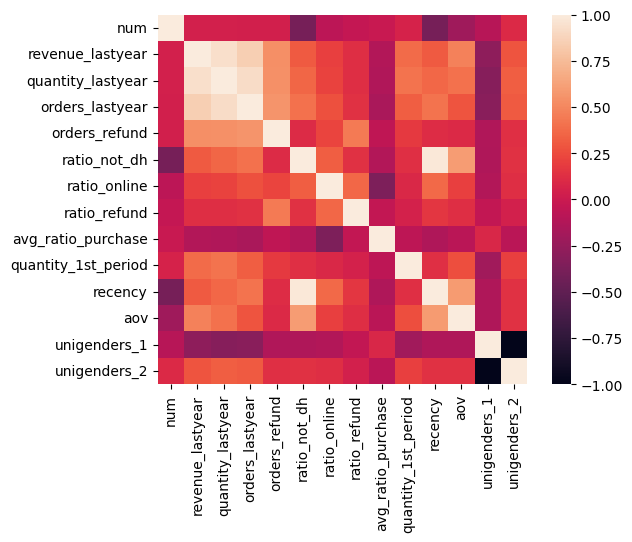

In [58]:
# построим тепловую карту кореляции, чтобы посмотреть зависимости между признаками
cor = df_bin.corr()
sns.heatmap(cor, square = True)

In [59]:
# Исключим (оставим, что в скобках) колонки, между которыми наблюдается зависимость
df_bin = df_bin.drop(['unigenders_1'], axis=1)

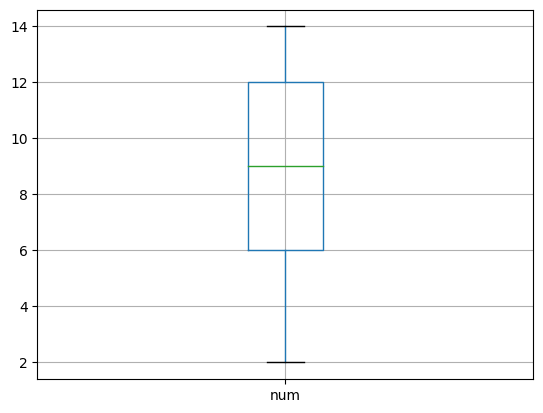

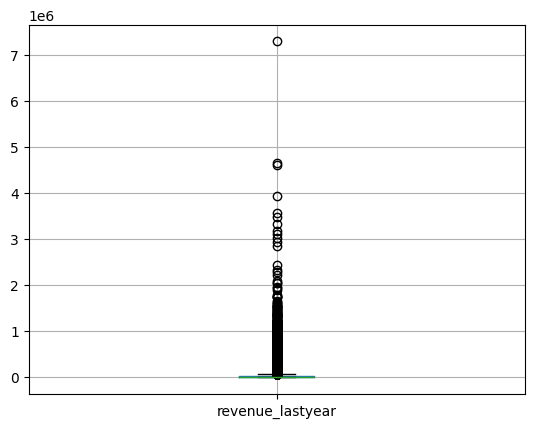

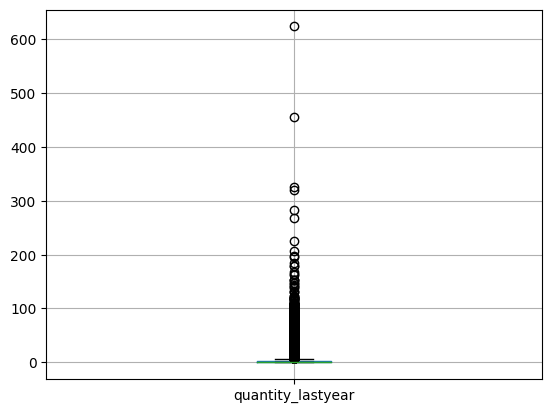

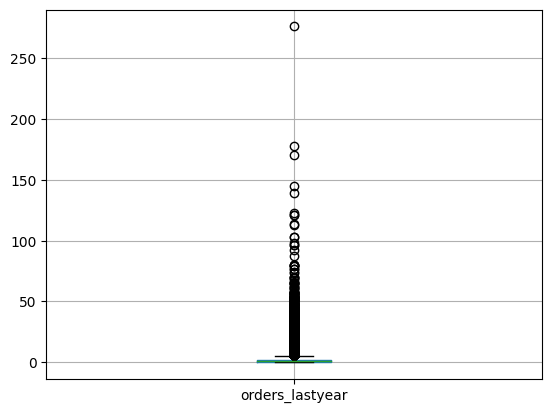

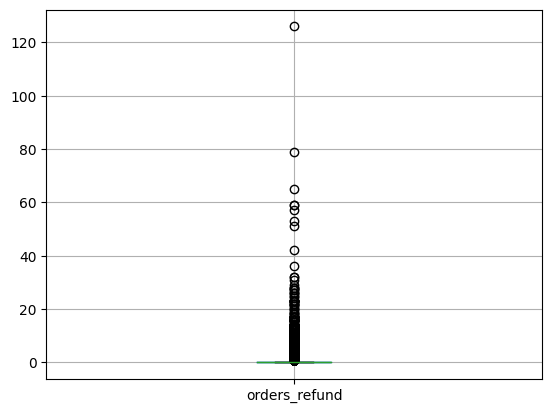

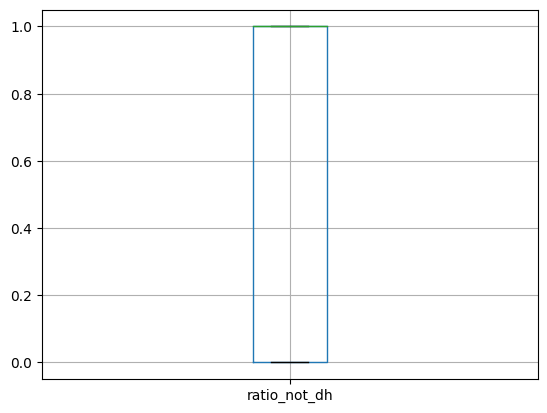

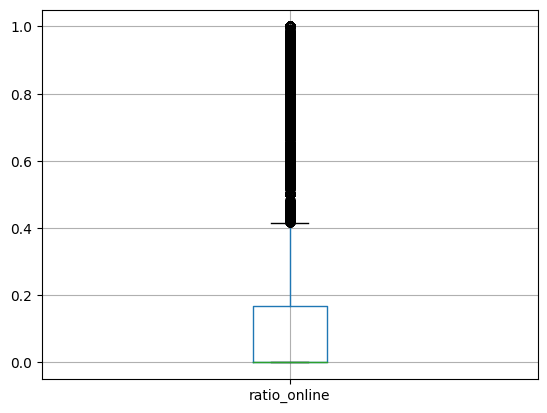

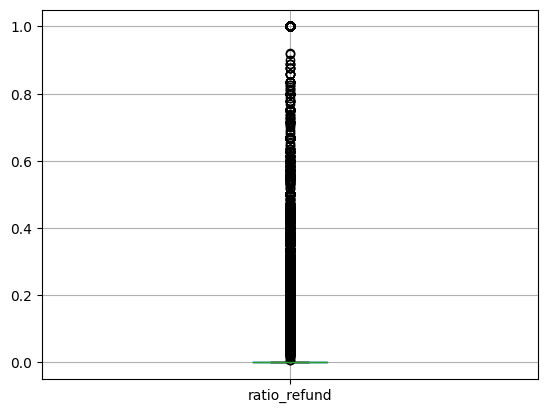

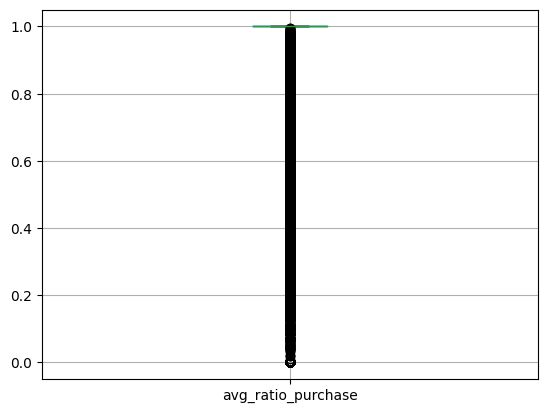

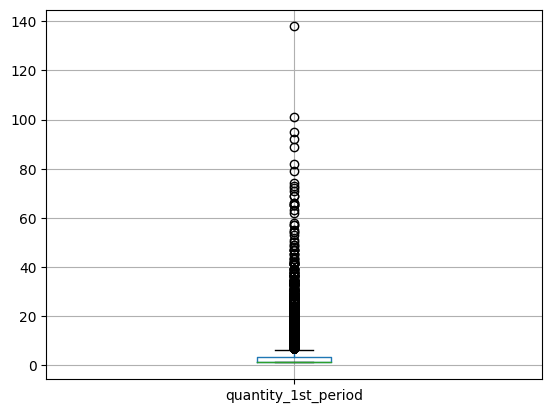

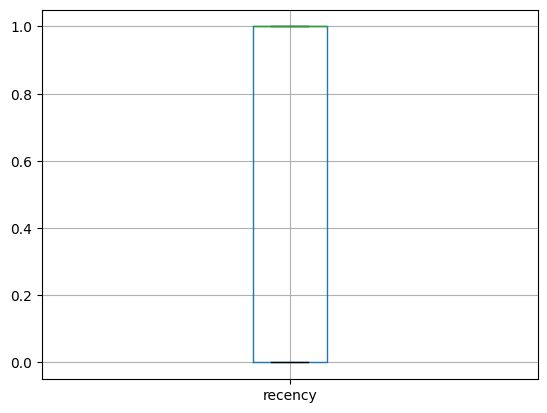

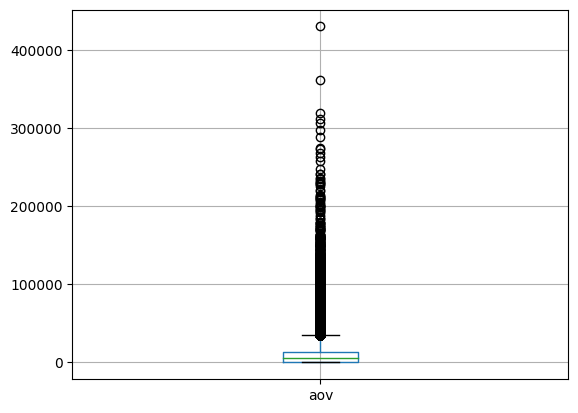

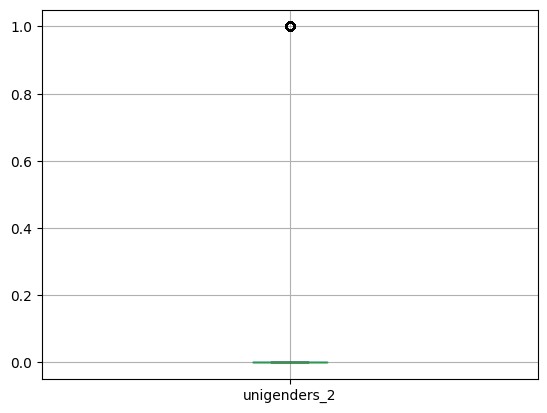

In [60]:
# построим боксплоты колонок, чтобы оценить выбросы данных
for column in df_bin:
    try:
        plt.figure()
        df_bin.boxplot([column])
    except:
        print("Smth wrong")

In [61]:
# в колонках, которые содержат выбросы, уберём 1% с крайних квантилей
for column in ['aov', 'quantity_1st_period', 'revenue_lastyear', 'ratio_refund', 'orders_refund', 'orders_lastyear',
              'quantity_lastyear']:
  limiter = df_bin[column].quantile(0.99)
  df_bin = df_bin[df_bin[column]<=limiter]

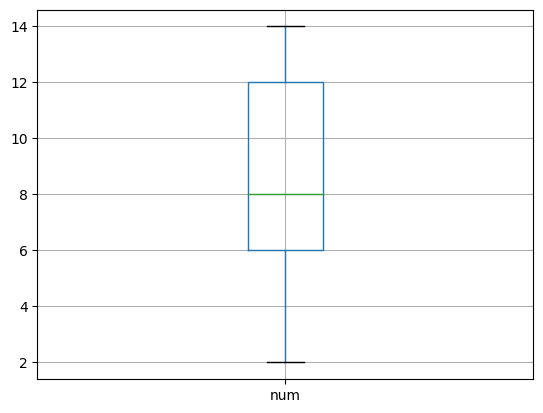

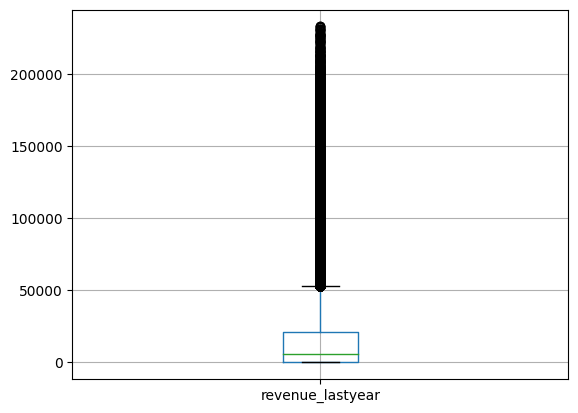

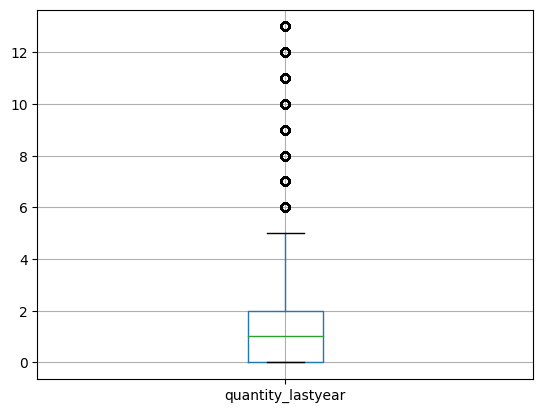

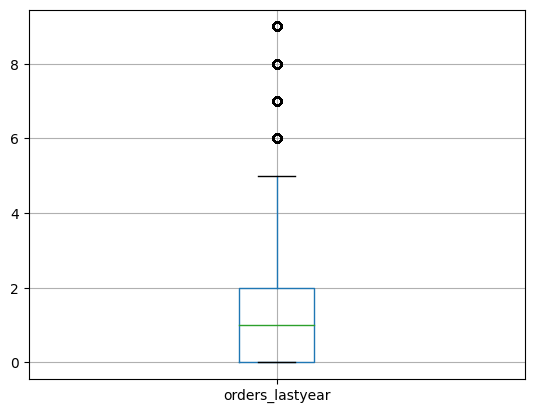

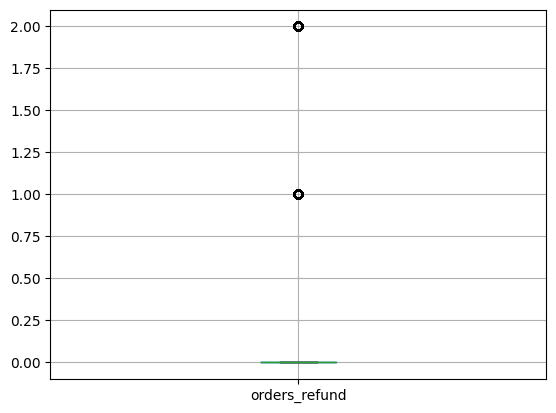

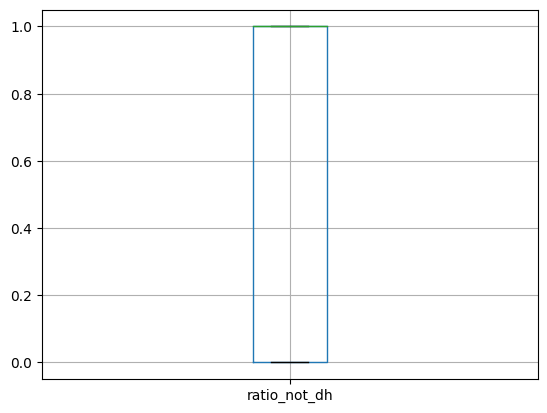

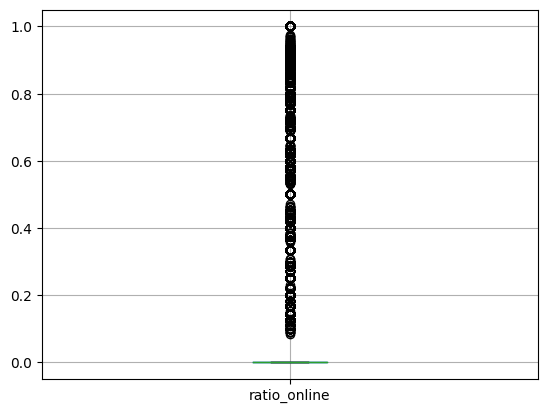

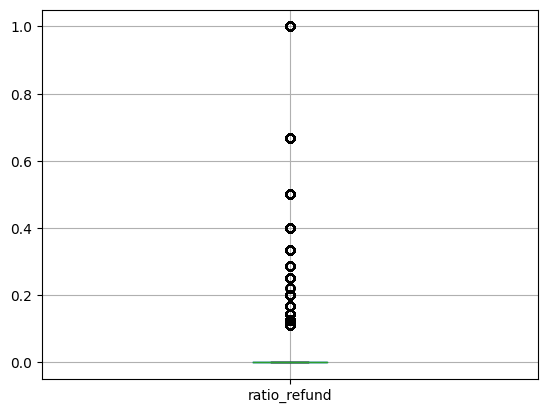

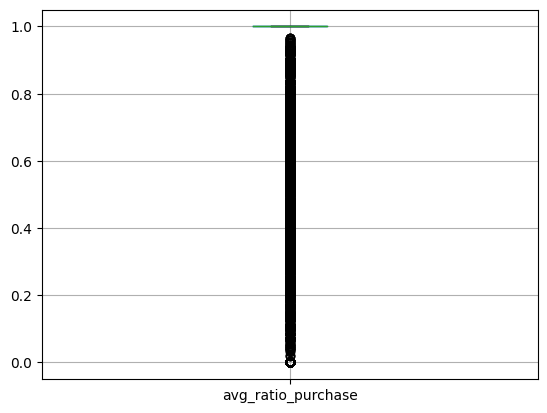

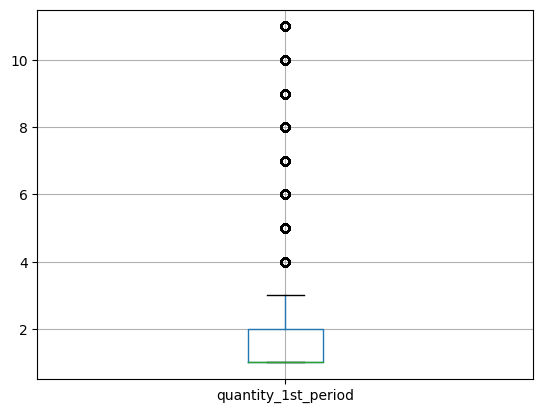

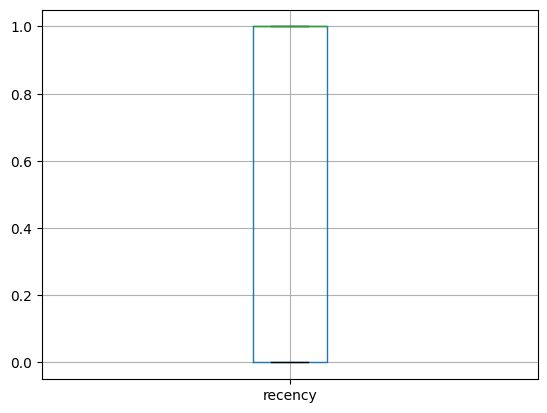

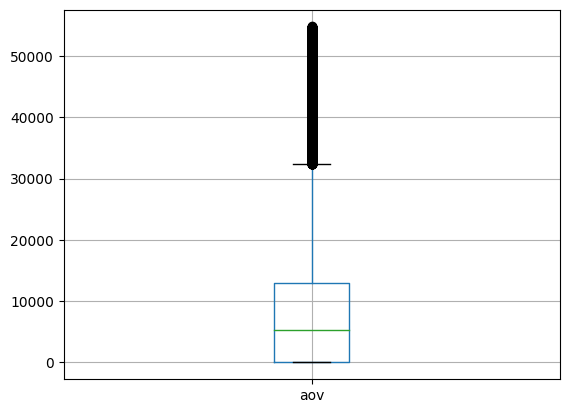

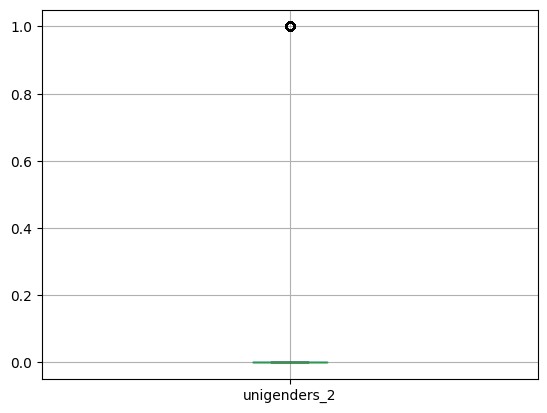

In [62]:
# опять отрисуем графики
for column in df_bin:
    try:
        plt.figure()
        df_bin.boxplot([column])
    except:
        print("Smth wrong")

In [63]:
df_bin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 287310 entries, 11 to 2247573
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   num                  287310 non-null  int64  
 1   revenue_lastyear     287310 non-null  float64
 2   quantity_lastyear    287310 non-null  int64  
 3   orders_lastyear      287310 non-null  int64  
 4   orders_refund        287310 non-null  int64  
 5   ratio_not_dh         287310 non-null  float64
 6   ratio_online         287310 non-null  float64
 7   ratio_refund         287310 non-null  float64
 8   avg_ratio_purchase   287310 non-null  float64
 9   quantity_1st_period  287310 non-null  float64
 10  recency              287310 non-null  int64  
 11  aov                  287310 non-null  float64
 12  unigenders_2         287310 non-null  uint8  
dtypes: float64(7), int64(5), uint8(1)
memory usage: 28.8 MB


In [64]:
# дропнем целевую колонку (ответы) при обучении модели
df_norm = df_bin.drop(['recency'], axis=1)

In [65]:
# масштабируем и стандартизируем данные соответствующими методами
scaler = StandardScaler()
scaler.fit(df_norm)
df_scale = pd.DataFrame(scaler.transform(df_norm), columns = df_norm.columns)
df_scale.head(10)

,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,aov,unigenders_2
0,1.295074,-0.628295,-0.707864,-0.766925,-0.20331,-1.173885,-0.5071,-0.180575,0.209011,1.264942,-0.818848,-0.19371
1,-0.664218,0.459332,0.117030,-0.095979,-0.20331,0.897938,-0.5071,-0.180575,0.209011,-0.003530,2.013668,-0.19371
2,-0.384319,-0.628295,-0.707864,-0.766925,-0.20331,-1.173885,-0.5071,-0.180575,0.209011,1.899178,-0.818848,-0.19371
3,0.455377,-0.628295,-0.707864,-0.766925,-0.20331,-1.173885,-0.5071,-0.180575,0.209011,-0.637766,-0.818848,-0.19371
4,1.295074,-0.628295,-0.707864,-0.766925,-0.20331,-1.173885,-0.5071,-0.180575,0.209011,1.264942,-0.818848,-0.19371
5,-0.384319,-0.628295,-0.707864,-0.766925,-0.20331,-1.173885,-0.5071,-0.180575,0.209011,-0.637766,-0.818848,-0.19371
6,-0.384319,-0.628295,-0.707864,-0.766925,-0.20331,-1.173885,-0.5071,-0.180575,0.209011,-0.003530,-0.818848,-0.19371
7,0.455377,-0.628295,-0.707864,-0.766925,-0.20331,-1.173885,-0.5071,-0.180575,0.209011,-0.003530,-0.818848,-0.19371
8,-0.104420,-0.628295,-0.707864,-0.766925,-0.20331,-1.173885,-0.5071,-0.180575,0.209011,-0.003530,-0.818848,-0.19371
9,1.015175,-0.628295,-0.707864,-0.766925,-0.20331,-1.173885,-0.5071,-0.180575,0.209011,-0.003530,-0.818848,-0.19371


In [66]:
df_norm = pd.DataFrame(normalize(df_scale), columns = df_scale.columns)
df_norm.head(10)

,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,aov,unigenders_2
0,0.481906,-0.233793,-0.263401,-0.285378,-0.075653,-0.436811,-0.188695,-0.067193,0.077774,0.470694,-0.304699,-0.072081
1,-0.272336,0.188331,0.047984,-0.039353,-0.083359,0.368164,-0.207916,-0.074037,0.085697,-0.001447,0.825624,-0.079423
2,-0.138504,-0.226431,-0.255106,-0.276391,-0.073271,-0.423055,-0.182753,-0.065077,0.075325,0.684443,-0.295104,-0.069811
3,0.213275,-0.294261,-0.331526,-0.359188,-0.095220,-0.549786,-0.237499,-0.084572,0.097890,-0.298696,-0.383506,-0.090724
4,0.481906,-0.233793,-0.263401,-0.285378,-0.075653,-0.436811,-0.188695,-0.067193,0.077774,0.470694,-0.304699,-0.072081
5,-0.181184,-0.296205,-0.333717,-0.361561,-0.095849,-0.553420,-0.239069,-0.085131,0.098537,-0.300670,-0.386040,-0.091323
6,-0.189975,-0.310576,-0.349908,-0.379103,-0.100499,-0.580269,-0.250667,-0.089261,0.103317,-0.001745,-0.404769,-0.095754
7,0.223477,-0.308336,-0.347385,-0.376369,-0.099775,-0.576085,-0.248860,-0.088617,0.102572,-0.001732,-0.401850,-0.095063
8,-0.052501,-0.315900,-0.355907,-0.385602,-0.102222,-0.590217,-0.254965,-0.090791,0.105089,-0.001775,-0.411708,-0.097395
9,0.455121,-0.281676,-0.317348,-0.343826,-0.091147,-0.526273,-0.227342,-0.080955,0.093703,-0.001582,-0.367104,-0.086844


array([[<AxesSubplot: title={'center': 'num'}>,
        <AxesSubplot: title={'center': 'revenue_lastyear'}>,
        <AxesSubplot: title={'center': 'quantity_lastyear'}>],
       [<AxesSubplot: title={'center': 'orders_lastyear'}>,
        <AxesSubplot: title={'center': 'orders_refund'}>,
        <AxesSubplot: title={'center': 'ratio_not_dh'}>],
       [<AxesSubplot: title={'center': 'ratio_online'}>,
        <AxesSubplot: title={'center': 'ratio_refund'}>,
        <AxesSubplot: title={'center': 'avg_ratio_purchase'}>],
       [<AxesSubplot: title={'center': 'quantity_1st_period'}>,
        <AxesSubplot: title={'center': 'aov'}>,
        <AxesSubplot: title={'center': 'unigenders_2'}>]], dtype=object)

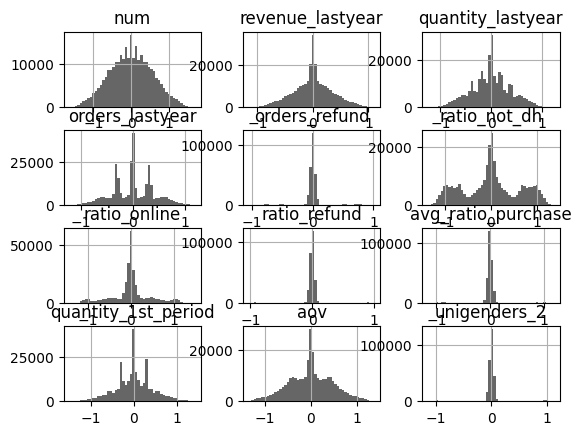

In [67]:
# посмотрим на форму распределения признаков (колонок) 
df_norm.diff().hist(color="k", alpha=0.6, bins=50)

In [68]:
# Разделим данные на признаки и целевую колонку
X = df_norm 
y = df_bin.recency        
y.head(10) 

11    0
16    1
22    0
31    0
43    0
49    0
55    0
64    0
71    0
82    0
Name: recency, dtype: int64

In [69]:
# разделим данные на обучающие и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=22)

In [71]:
# определим классификатор и параметры (можно было использовать GridSearch CV для поиска лучших параметров), обучим
extc = ExtraTreesClassifier(n_estimators=60, max_features= 99, criterion= 'entropy', min_samples_split= 8,
                            max_depth= 12, min_samples_leaf= 4)      
extc.fit(X_train,y_train)

ExtraTreesClassifier(criterion='entropy', max_depth=12, max_features=99,
                     min_samples_leaf=4, min_samples_split=8, n_estimators=60)

In [35]:
# посмотрим на метрики F1 и ROC-AUC
f1_score(y_test, extc.predict(X_test))

0.9986086265156032

In [73]:
# есть подозрение на переобучение деревьев, но нам нужны признаки, которые в большей степени снижат энтропию
# или увеличивают определённость отнесения объекта к какому-то классу
roc_auc_score(y_test, extc.predict_proba(X_test)[:, 1])

0.9996684670524038

<AxesSubplot: >

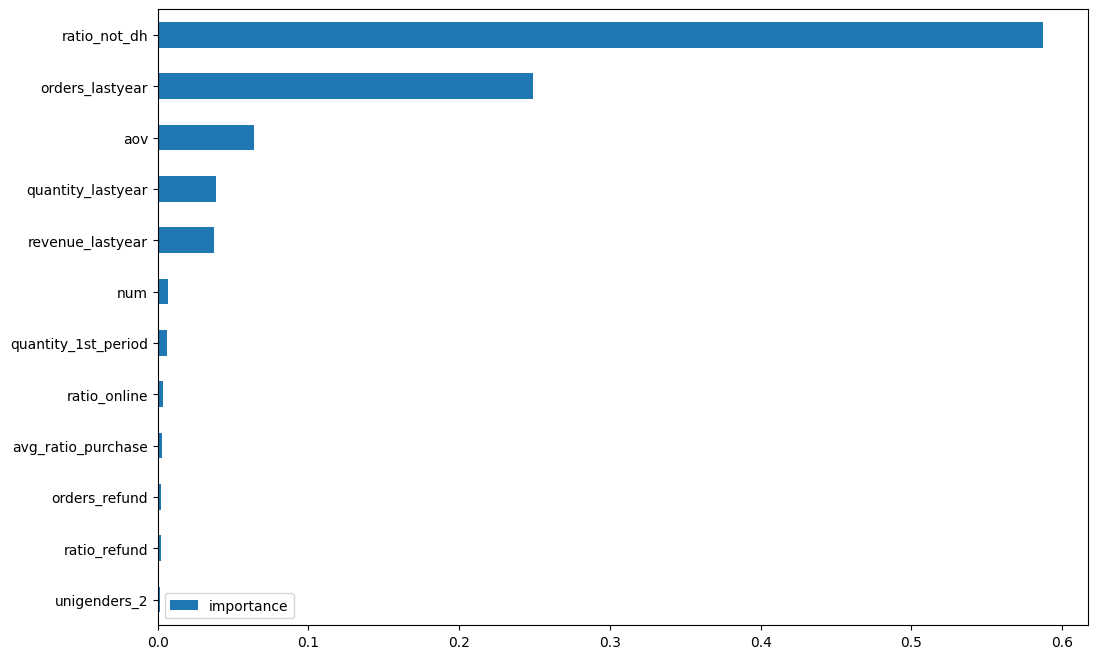

In [74]:
# выведем вес признаков, по которым определяется активен пользователь или в оттоке
imp = pd.DataFrame(extc.feature_importances_, index=X_train.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(12, 8))

In [75]:
# вес признаков в табличном виде
feature_importances = extc.feature_importances_
feature_importances_df = pd.DataFrame({'features': list(X_train), 'feature_importances': feature_importances})
fi_df_sort = feature_importances_df.sort_values('feature_importances', ascending = False)
fi_df_sort

,features,feature_importances
5,ratio_not_dh,0.587577
3,orders_lastyear,0.248784
10,aov,0.063648
2,quantity_lastyear,0.038448
1,revenue_lastyear,0.037273
0,num,0.006654
9,quantity_1st_period,0.005851
6,ratio_online,0.003337
8,avg_ratio_purchase,0.002782
4,orders_refund,0.001982


In [76]:
# Далее определим на какие группы делятся активные пользователи. Подготовм данные для кластеризации
df_norm2 = df_bin
df_norm2 = df_norm2.loc[df_norm2['recency'] == 1]
scaler = StandardScaler()
scaler.fit(df_norm2)
df_scale = pd.DataFrame(scaler.transform(df_norm2), columns = df_norm2.columns)
df_scale.head(10)

,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,recency,aov,unigenders_2
0,-0.288338,0.013179,-0.365929,-0.639281,-0.269572,0.321913,-0.705741,-0.238639,0.268845,-0.088020,0.0,1.514900,-0.237548
1,0.776347,-0.582394,-0.365929,-0.639281,-0.269572,0.321913,1.763515,-0.238639,0.268845,0.506330,0.0,-0.301799,-0.237548
2,-0.288338,-0.442259,-0.365929,0.031962,-0.269572,-3.289309,1.763515,-0.238639,0.268845,-0.088020,0.0,-0.673688,-0.237548
3,0.776347,-0.091922,-0.365929,-0.639281,-0.269572,0.321913,-0.705741,-0.238639,0.268845,-0.682371,0.0,1.194306,-0.237548
4,-0.554509,-0.406525,-0.758483,-0.639281,-0.269572,0.321913,1.763515,-0.238639,0.268845,-0.682371,0.0,0.234662,-0.237548
5,-0.820681,-0.756862,-0.758483,-0.639281,-0.269572,0.321913,1.763515,-0.238639,0.268845,-0.682371,0.0,-0.833985,-0.237548
6,-0.554509,-0.407225,-0.365929,0.031962,-0.269572,0.321913,-0.705741,-0.238639,0.268845,-0.088020,0.0,-0.620256,-0.237548
7,-0.288338,-0.687495,-0.365929,-0.639281,-0.269572,0.321913,-0.705741,-0.238639,0.268845,-0.088020,0.0,-0.622393,-0.237548
8,0.510176,0.292048,0.419180,0.031962,-0.269572,0.321913,1.763515,-0.238639,0.268845,-0.682371,0.0,0.446254,-0.237548
9,-0.288338,-0.565578,0.026626,-0.639281,-0.269572,0.321913,-0.705741,-0.238639,0.268845,0.506330,0.0,-0.250504,-0.237548


In [77]:
df_norm2 = pd.DataFrame(normalize(df_scale), columns = df_scale.columns)
df_norm2.head(15)

,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,recency,aov,unigenders_2
0,-0.148137,0.006771,-0.188000,-0.328438,-0.138496,0.165386,-0.362582,-0.122604,0.138122,-0.045221,0.0,0.778297,-0.122043
1,0.337101,-0.252883,-0.158891,-0.277585,-0.117052,0.139779,0.765742,-0.103620,0.116736,0.219856,0.0,-0.131045,-0.103147
2,-0.074292,-0.113951,-0.094284,0.008235,-0.069457,-0.847515,0.454382,-0.061487,0.069270,-0.022679,0.0,-0.173581,-0.061206
3,0.392828,-0.046512,-0.185158,-0.323473,-0.136402,0.162887,-0.357102,-0.120750,0.136034,-0.345277,0.0,0.604314,-0.120198
4,-0.237540,-0.174146,-0.324918,-0.273854,-0.115479,0.137901,0.755452,-0.102228,0.115167,-0.292313,0.0,0.100524,-0.101760
5,-0.313259,-0.288899,-0.289518,-0.244018,-0.102897,0.122876,0.673145,-0.091090,0.102620,-0.260465,0.0,-0.318337,-0.090674
6,-0.406507,-0.298534,-0.268260,0.023431,-0.197621,0.235992,-0.517374,-0.174945,0.197088,-0.064527,0.0,-0.454705,-0.174145
7,-0.187951,-0.448137,-0.238527,-0.416709,-0.175718,0.209836,-0.460031,-0.155555,0.175244,-0.057375,0.0,-0.405701,-0.154843
8,0.236359,0.135303,0.194202,0.014808,-0.124890,0.149139,0.817019,-0.110559,0.124553,-0.316136,0.0,0.206745,-0.110054
9,-0.204318,-0.400771,0.018867,-0.452998,-0.191020,0.228109,-0.500092,-0.169101,0.190505,0.358788,0.0,-0.177508,-0.168328


In [78]:
df_norm2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167987 entries, 0 to 167986
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   num                  167987 non-null  float64
 1   revenue_lastyear     167987 non-null  float64
 2   quantity_lastyear    167987 non-null  float64
 3   orders_lastyear      167987 non-null  float64
 4   orders_refund        167987 non-null  float64
 5   ratio_not_dh         167987 non-null  float64
 6   ratio_online         167987 non-null  float64
 7   ratio_refund         167987 non-null  float64
 8   avg_ratio_purchase   167987 non-null  float64
 9   quantity_1st_period  167987 non-null  float64
 10  recency              167987 non-null  float64
 11  aov                  167987 non-null  float64
 12  unigenders_2         167987 non-null  float64
dtypes: float64(13)
memory usage: 16.7 MB


In [80]:
# Тут разделил данные, чтобы снизить вычислительную нагрузку. Взял только 10% данных. 
# название данных подобрано не совсем адекватно.
X_test, y_test = train_test_split(df_norm2, test_size=0.10, random_state=22)
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16799 entries, 35251 to 59136
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   num                  16799 non-null  float64
 1   revenue_lastyear     16799 non-null  float64
 2   quantity_lastyear    16799 non-null  float64
 3   orders_lastyear      16799 non-null  float64
 4   orders_refund        16799 non-null  float64
 5   ratio_not_dh         16799 non-null  float64
 6   ratio_online         16799 non-null  float64
 7   ratio_refund         16799 non-null  float64
 8   avg_ratio_purchase   16799 non-null  float64
 9   quantity_1st_period  16799 non-null  float64
 10  recency              16799 non-null  float64
 11  aov                  16799 non-null  float64
 12  unigenders_2         16799 non-null  float64
dtypes: float64(13)
memory usage: 1.8 MB


In [83]:
# код и параметры для кластеризации по данным с помощью scipy
# кол-во групп выбрано 10, можно было построить график по методу локтя и определить оптимальное число кластеров
# import matplotlib.pyplot as plt
#from scipy.cluster.hierarchy import *
#import numpy as np
#from scipy.spatial.distance import pdist

#data_dist = pdist(df, 'euclidean')
#data_linkage = linkage(data_dist, method='ward')
#last = data_linkage[-10:, 2]
#last_rev = last[::-1]
#idxs = np.arange(1, len(last) + 1)
#plt.plot(idxs, last_rev)

#acceleration = np.diff(last, 2)  
#acceleration_rev = acceleration[::-1]
#plt.plot(idxs[:-2] + 1, acceleration_rev)
#plt.show()
#k = acceleration_rev.argmax() + 2 
#print("Рекомендованное количество кластеров:", k)
#dist_metric = 'euclidean'
#link_meth = 'ward'
#nClusts = 10
#f_cl_criterion='maxclust'

data_dist = pdist(y_test, metric=dist_metric)
data_linkage = linkage(data_dist, method=link_meth)
clusters=fcluster(data_linkage, nClusts, criterion=f_cl_criterion)
print(silhouette_score(y_test, clusters, metric=dist_metric))

0.28741954744783854


In [84]:
# посмотрим какое колв-во объектов попало в каждый кластер I - номер кластера, Количество - число сэмплов в кластере
y_test['I']=clusters
res=y_test.groupby('I')[list(y_test.columns)].mean()
res['Количество']=y_test.groupby('I').size().values
res.sort_values('Количество', axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None).tail(20)

,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,recency,aov,unigenders_2,I,Количество
I,,,,,,,,,,,,,,,
2,-0.367051,-0.284907,-0.291420,-0.251392,-0.148767,0.177235,-0.383216,-0.131697,0.148366,-0.255800,0.0,-0.213354,-0.131094,2.0,4995
1,0.503611,-0.181256,-0.169648,-0.155241,-0.128499,0.152943,-0.331592,-0.113754,0.128153,0.009200,0.0,-0.114855,-0.113234,1.0,2297
10,0.166802,0.392001,0.416784,0.419360,-0.082569,0.057972,-0.018535,-0.073094,0.016824,0.064860,0.0,0.105283,-0.072760,10.0,1774
5,-0.074616,-0.197398,-0.211817,-0.158345,-0.120837,0.142996,0.597564,-0.106971,0.120511,-0.117251,0.0,-0.141125,-0.106482,5.0,1722
7,-0.185526,0.151451,-0.035133,-0.157095,-0.111755,0.125039,-0.119678,-0.098931,0.110673,0.024820,0.0,0.655583,-0.098479,7.0,1268
3,0.017125,-0.102358,-0.053883,-0.016640,-0.076653,-0.707302,0.220038,-0.067857,-0.016266,-0.066003,0.0,-0.132106,-0.067547,3.0,1133
8,0.037977,0.103667,0.097331,0.137037,0.568107,-0.055528,0.190462,0.481908,-0.014955,0.035532,0.0,0.013644,-0.041082,8.0,1131
9,0.113106,0.104315,0.141885,0.127992,0.003341,0.013104,0.014342,-0.015657,-0.019594,0.092566,0.0,0.025073,0.762237,9.0,943
6,-0.198451,0.053289,0.227294,0.029597,-0.117853,0.106305,-0.260513,-0.104330,0.112218,0.514733,0.0,0.133773,-0.103852,6.0,934


<AxesSubplot: >

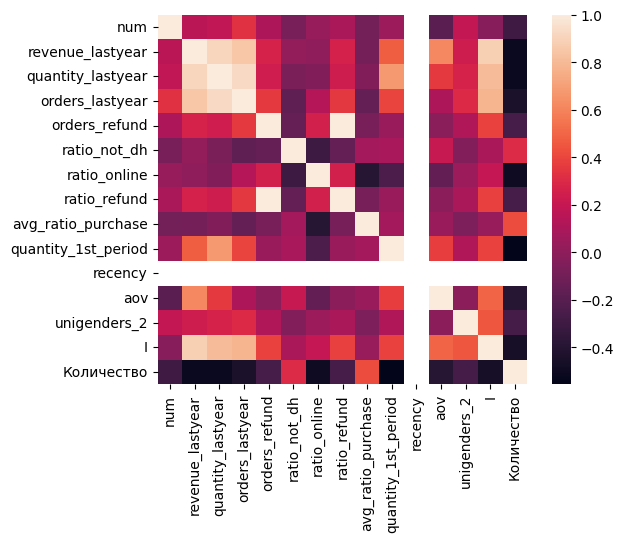

In [86]:
# построим по данным модель классификации, где целевой колонкой будет номер кластера I, чтобы выявить признаки, по 
# которым формировались кластеры
# построим тепловую карту, исключим ненужные колонки
cor = res.corr()
sns.heatmap(cor, square = True)

In [87]:
# исключаем колонки, делим сет
X = res.drop(['I', 'Количество', 'recency'], axis = 1) 
y = res.I         

In [88]:
# обучаем ансамбль деревьев (можно взять и другой алгоритм классификации)
extc = ExtraTreesClassifier(n_estimators=60, max_features= 99, criterion= 'entropy', min_samples_split= 8,
                            max_depth= 12, min_samples_leaf= 4)      
extc.fit(X, y)

ExtraTreesClassifier(criterion='entropy', max_depth=12, max_features=99,
                     min_samples_leaf=4, min_samples_split=8, n_estimators=60)

<AxesSubplot: >

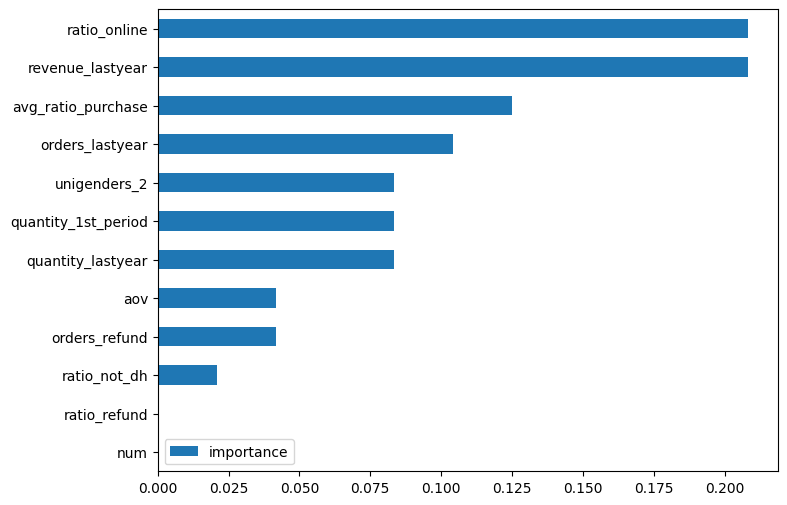

In [89]:
# выведем признаки, по которым произошла кластеризация в большей степени
imp = pd.DataFrame(extc.feature_importances_, index=X.columns, columns=['importance'])
imp.sort_values('importance').plot(kind='barh', figsize=(8, 6))

In [90]:
# то же, что выше в табличном виде
feature_importances_df = pd.DataFrame({'features': list(X), 'feature_importances': extc.feature_importances_})
fi_df_sort = feature_importances_df.sort_values('feature_importances', ascending = False)
fi_df_sort

,features,feature_importances
1,revenue_lastyear,0.208333
6,ratio_online,0.208333
8,avg_ratio_purchase,0.125000
3,orders_lastyear,0.104167
2,quantity_lastyear,0.083333
9,quantity_1st_period,0.083333
11,unigenders_2,0.083333
4,orders_refund,0.041667
10,aov,0.041667
5,ratio_not_dh,0.020833


<AxesSubplot: >

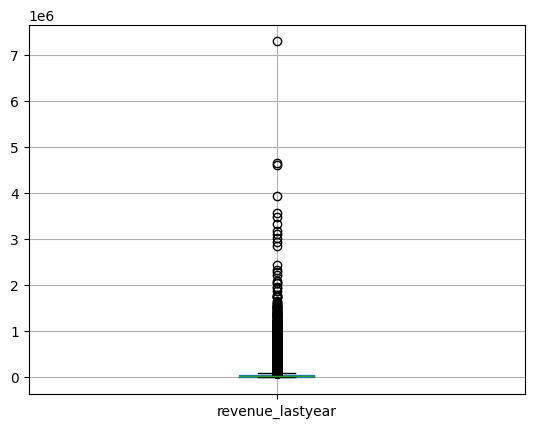

In [91]:
# Определим топовость клиентов по параметру большего revenue_lastyear - целевой параметр
# Для этого обучим модель ридж-регрессии, чтобы выявить признаки по которым увеличивается целевой параметр
# несмотря на то, что мы ищем топовых клиентов, выбросы лучше убрать. Поэтому строим боксплоты, отрезаем 1% распределения
df_reg = df.loc[df['period_end'] == '2022-12-07']
df_reg = df_reg.loc[df_reg['revenue_lastyear'] > 0]

plt.figure()
df_reg.boxplot(['revenue_lastyear'])

<AxesSubplot: >

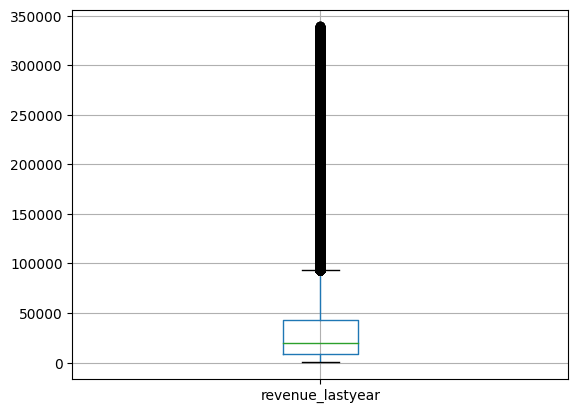

In [92]:
limiter = df_reg['revenue_lastyear'].quantile(0.99)
df_reg = df_reg[df_reg['revenue_lastyear']<=limiter]
plt.figure()
df_reg.boxplot(['revenue_lastyear'])

In [93]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180917 entries, 16 to 2247573
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           180917 non-null  int64  
 1   actual_id            180917 non-null  int64  
 2   period_end           180917 non-null  object 
 3   num                  180917 non-null  int64  
 4   revenue_lastyear     180917 non-null  float64
 5   quantity_lastyear    180917 non-null  int64  
 6   orders_lastyear      180917 non-null  int64  
 7   orders_refund        180917 non-null  int64  
 8   ratio_not_dh         180917 non-null  float64
 9   ratio_online         180917 non-null  float64
 10  ratio_refund         180917 non-null  float64
 11  avg_ratio_purchase   180917 non-null  float64
 12  quantity_1st_period  180917 non-null  float64
 13  recency              180917 non-null  int64  
 14  aov                  180917 non-null  float64
 15  unigenders_1   

In [94]:
df_reg.head(10)

,Unnamed: 0,actual_id,period_end,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_not_dh,ratio_online,ratio_refund,avg_ratio_purchase,quantity_1st_period,recency,aov,unigenders_1,unigenders_2
16,16,12013960666,2022-12-07,6,27960.0,2,1,0,1.000000,0.000000,0.0,1.0,2.0,339,27960.0,1,0
91,91,12063704219,2022-12-07,10,10960.0,2,1,0,1.000000,1.000000,0.0,1.0,3.0,326,10960.0,1,0
133,133,12068234221,2022-12-07,6,14960.0,2,2,0,0.624374,1.000000,0.0,1.0,2.0,337,7480.0,1,0
153,153,12069928477,2022-12-07,10,24960.0,2,1,0,1.000000,0.000000,0.0,1.0,1.0,360,24960.0,1,0
170,170,12124564545,2022-12-07,5,15980.0,1,1,0,1.000000,1.000000,0.0,1.0,1.0,292,15980.0,1,0
209,209,12321323213,2022-12-07,4,5980.0,1,1,0,1.000000,1.000000,0.0,1.0,1.0,202,5980.0,1,0
361,361,13109759363,2022-12-07,5,15960.0,2,2,0,1.000000,0.000000,0.0,1.0,2.0,287,7980.0,1,0
464,464,13472749979,2022-12-07,9,243814.0,35,20,0,1.000000,0.045455,0.0,0.0,1.0,148,12190.7,1,0
503,503,13476093978,2022-12-07,6,7960.0,2,1,0,1.000000,0.000000,0.0,1.0,2.0,313,7960.0,1,0
569,569,13478890083,2022-12-07,9,35920.0,4,2,0,1.000000,1.000000,0.0,1.0,1.0,276,17960.0,1,0


In [95]:
# сбрасываем на мой взгляд ненужные (по разным причинам) колонки
df_reg = df_reg.drop(['unigenders_1', 'Unnamed: 0', 'actual_id', 'period_end', 'recency'], axis=1)

<AxesSubplot: >

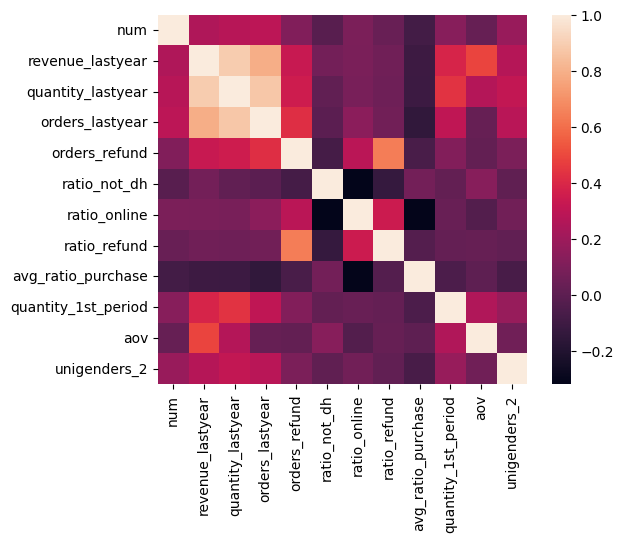

In [96]:
cor = df_reg.corr()
sns.heatmap(cor, square = True)

In [97]:
# отбрасываем колонки с коллинеарностью по карте
df_reg = df_reg.drop(['avg_ratio_purchase', 'ratio_not_dh'], axis=1)

In [98]:
# масштабируем, стандартизируем
df_regnorm = df_reg
scaler = StandardScaler()
scaler.fit(df_regnorm)
df_scale = pd.DataFrame(scaler.transform(df_regnorm), columns = df_regnorm.columns)
df_scale.head(10)

,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_online,ratio_refund,quantity_1st_period,aov,unigenders_2
0,-0.328795,-0.178160,-0.396716,-0.542463,-0.250523,-0.727803,-0.255734,-0.170362,1.017965,-0.269673
1,0.720243,-0.541710,-0.396716,-0.542463,-0.250523,1.745284,-0.255734,0.251156,-0.325135,-0.269673
2,-0.328795,-0.456169,-0.396716,-0.139371,-0.250523,1.745284,-0.255734,-0.170362,-0.600076,-0.269673
3,0.720243,-0.242316,-0.396716,-0.542463,-0.250523,-0.727803,-0.255734,-0.591880,0.780947,-0.269673
4,-0.591055,-0.434356,-0.622389,-0.542463,-0.250523,1.745284,-0.255734,-0.591880,0.071475,-0.269673
5,-0.853315,-0.648209,-0.622389,-0.542463,-0.250523,1.745284,-0.255734,-0.591880,-0.718584,-0.269673
6,-0.591055,-0.434783,-0.396716,-0.139371,-0.250523,-0.727803,-0.255734,-0.170362,-0.560573,-0.269673
7,0.457983,4.437949,7.050479,7.116284,-0.250523,-0.615390,-0.255734,-0.591880,-0.227902,-0.269673
8,-0.328795,-0.605866,-0.396716,-0.542463,-0.250523,-0.727803,-0.255734,-0.170362,-0.562153,-0.269673
9,0.457983,-0.007932,0.054629,-0.139371,-0.250523,1.745284,-0.255734,-0.591880,0.227906,-0.269673


In [99]:
df_norm = pd.DataFrame(normalize(df_scale), columns = df_scale.columns)
df_norm.head(10)

,num,revenue_lastyear,quantity_lastyear,orders_lastyear,orders_refund,ratio_online,ratio_refund,quantity_1st_period,aov,unigenders_2
0,-0.212798,-0.115306,-0.256756,-0.351084,-0.162140,-0.471037,-0.165512,-0.110259,0.658831,-0.174534
1,0.332949,-0.250418,-0.183391,-0.250766,-0.115810,0.806797,-0.118219,0.116103,-0.150301,-0.124663
2,-0.161809,-0.224493,-0.195234,-0.068588,-0.123289,0.858900,-0.125853,-0.083840,-0.295313,-0.132713
3,0.436719,-0.146928,-0.240549,-0.328923,-0.151905,-0.441303,-0.155064,-0.358887,0.473528,-0.163516
4,-0.269163,-0.197803,-0.283432,-0.247035,-0.114087,0.794792,-0.116460,-0.269539,0.032549,-0.122808
5,-0.350015,-0.265884,-0.255293,-0.222509,-0.102760,0.715885,-0.104897,-0.242779,-0.294751,-0.110615
6,-0.441894,-0.325060,-0.296599,-0.104199,-0.187300,-0.544132,-0.191196,-0.127369,-0.419104,-0.201617
7,0.041594,0.403054,0.640324,0.646300,-0.022753,-0.055890,-0.023226,-0.053755,-0.020698,-0.024492
8,-0.232351,-0.428150,-0.280349,-0.383344,-0.177038,-0.514319,-0.180720,-0.120390,-0.397259,-0.190571
9,0.232464,-0.004026,0.027729,-0.070742,-0.127161,0.885875,-0.129806,-0.300428,0.115681,-0.136881


In [100]:
# делим данные на признаки и целевую колонку
X = df_norm.drop(['revenue_lastyear'], axis=1)
y = df_norm.revenue_lastyear       
y.head(10) 

0   -0.115306
1   -0.250418
2   -0.224493
3   -0.146928
4   -0.197803
5   -0.265884
6   -0.325060
7    0.403054
8   -0.428150
9   -0.004026
Name: revenue_lastyear, dtype: float64

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=22)

In [102]:
# обучаем модель Ридж-регрессии (гиперпараметры оставил по-умолчанию)
clf = Ridge(alpha=1.0)
clf.fit(X_train, y_train)

Ridge()

In [103]:
# выведем коэффициенты модели и, сверив со списком признаков определим те, кто оказывают большее влияние на увеличения
# показателя revenue_lastyear, по которому решили определять топовость
clf.coef_

array([ 3.46498584e-04,  2.58390367e-01,  5.07164487e-01,  4.39921185e-02,
        8.59493419e-03, -6.13602579e-03, -2.93748125e-02,  3.82830511e-01,
        2.70290659e-02])

In [104]:
# из списка видно, что коэффициенты (в порядке убывания приоритета) 3, 8, 2, 4, 9 более других относят клиента в топ.
X.columns

Index(['num', 'quantity_lastyear', 'orders_lastyear', 'orders_refund',
       'ratio_online', 'ratio_refund', 'quantity_1st_period', 'aov',
       'unigenders_2'],
      dtype='object')

In [ ]:
1. Клиентов в оттоке (при отсутствии заказов в течении года и более): 119808
Клиентов в предоттоке (отсутствие заказов более 300 дней): 24722
2. Учитывая, что данные (большая часть) являются деривативами от цены и даты, а не уникальными данными, то возникает 
много корреляций.И выделение признаков какой-либо группы по таким данным представляется малоэффективным. Тем не менее:
    Aктивных клиентов отличают следующие особенности в порядке приоритета:
        - ratio_not_dh
        - orders_lastyear
        - aov
        - quantity_lastyear
        - revenue_lastyear
    Агломеративная кластеризация выделила 10 групп, на которые делятся активные пользователи по следующим признакам
    в порядке приоритета:
        - revenue_lastyear
        - ratio_online
        - avg_ratio_purchase
        - orders_lastyear
        - quantity_lastyear
        - quantity_1st_period
        - unigenders_2       
3. Характеристики топовых (по revenue_lastyear) клиентов из числа активных клиентов (выше показатель - выше 'топовость'):
        - orders_lastyear
        - aov
        - quantity_lastyear
        - orders_refund
        - unigenders_2
        